In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/employee_attrition.csv')

### Демографические группы, подверженные уходу с работы

In [3]:
bins = [
    18,
    25,
    30,
    35,
    40,
    50,
    60,
    100,
]

In [4]:
labels = [
    '18-25',
    '26-30',
    '31-35',
    '36-40',
    '41-50',
    '51-60',
    '60+',
]

In [5]:
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [6]:
grouped = df.groupby('Age_Group', observed=False).agg(
    {
        'Job_Satisfaction': 'mean',
        'Attrition': lambda x: (x == 'Yes').mean() * 100,
        'Age_Group': 'count',
    }
).rename(
    columns={
        'Job_Satisfaction': 'Avg_Satisfaction',
        'Attrition': 'Attrition_Rate',
        'Age_Group': 'Count',
    }
)

grouped.reset_index(inplace=True)

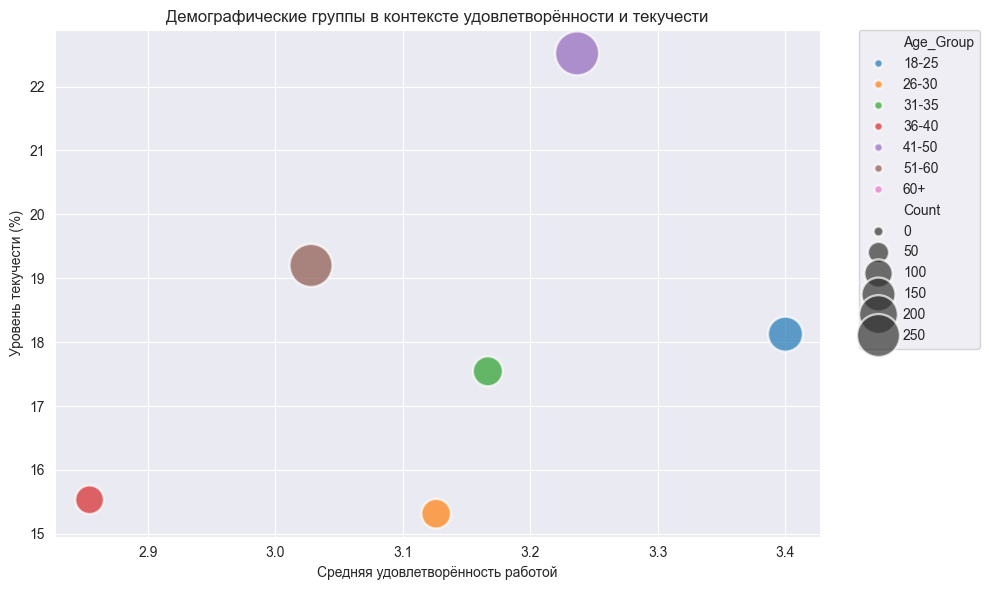

In [7]:
plt.figure(figsize=(10, 6))
bubble_plot = sns.scatterplot(
    data=grouped,
    x='Avg_Satisfaction',
    y='Attrition_Rate',
    size='Count',
    sizes=(50, 1000),
    hue='Age_Group',
    alpha=0.7
)

plt.title('Демографические группы в контексте удовлетворённости и текучести')
plt.xlabel('Средняя удовлетворённость работой')
plt.ylabel('Уровень текучести (%)')
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0,
)
plt.tight_layout()
plt.show()

### Взаимоотношения с руководством

In [8]:
excellent_value = df['Relationship_with_Manager'].max()

In [9]:
df['Relationship_with_Manager'] = pd.to_numeric(df['Relationship_with_Manager'], errors='coerce')
df = df.dropna(subset=['Relationship_with_Manager'])

In [10]:
total_employees = len(df)

In [11]:
excellent_count = (df['Relationship_with_Manager'] == excellent_value).sum()

In [12]:
excellent_percent = (excellent_count / total_employees) * 100
not_excellent_percent = 100 - excellent_percent

In [13]:
print(
    f"Только {excellent_percent:.1f}% сотрудников считают отношения с руководителем отличными",
    f"в то время как {not_excellent_percent:.1f}% не удовлетворены или имеют более низкую оценку.",
    sep='\n',
)

Только 25.1% сотрудников считают отношения с руководителем отличными
в то время как 74.9% не удовлетворены или имеют более низкую оценку.
